# Modelos de Classificação

In [ ]:
!pip install xgboost
!pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [2]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate, train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [3]:
ind_vars = pd.read_csv('./code_metrics.csv', index_col='question')
ind_vars

,complexity,loc,lloc,sloc,comments,single_comments,multi_comments,blank_lines,h1,h2,...,builtin_type,builtin_func,kwd_print,kwd_input,builtin_type_unique,builtin_func_unique,identifiers_unique,identifiers_max_len,identifiers_min_len,identifiers_mean_len
question,,,,,,,,,,,,,,,,,,,,,
1002,1.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,2.0,6.0,...,2.0,1.0,1.0,2.0,1,3,6,12.0,2.0,6.000000
1020,1.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,3.0,8.0,...,4.0,1.0,1.0,4.0,1,3,6,5.0,1.0,2.166667
1023,1.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,6.0,...,2.0,1.0,1.0,2.0,1,3,6,19.0,2.0,8.333333
1025,1.0,10.0,6.0,6.0,3.0,3.0,0.0,1.0,2.0,6.0,...,3.0,1.0,1.0,3.0,1,3,5,11.0,1.0,5.400000
1027,1.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,2.0,7.0,...,1.0,1.0,1.0,1.0,1,3,2,11.0,7.0,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,4.0,31.0,16.0,15.0,2.0,2.0,5.0,9.0,1.0,2.0,...,8.0,0.0,2.0,2.0,3,2,11,9.0,1.0,5.181818
3229,1.0,13.0,7.0,8.0,3.0,2.0,0.0,3.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0,3,9,7.0,1.0,4.555556
3309,1.0,6.0,4.0,4.0,0.0,0.0,0.0,2.0,2.0,7.0,...,1.0,1.0,1.0,1.0,1,3,2,11.0,5.0,8.000000


In [4]:
dep_vars = pd.read_csv('./question_info.csv', index_col='question')
dep_vars

,taxa_acerto,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_erros_lgcs,num_errors_stx,num_eventos,num_eventos_del,tempo_implementacao,num_std_sem_submissao,qtd_alteracoes_codigo
question,,,,,,,,,,,,,
1002,1.000000,1.250000,0.800000,8.062500,9.312500,0.250000,0.125000,0.125000,72.625000,7.812500,0.000000,2.0,151.750000
1020,0.900000,6.750000,0.133333,18.000000,24.750000,5.850000,1.350000,4.500000,820.450000,123.950000,88.009611,14.0,537.250000
1023,0.937500,3.187500,0.294118,12.000000,15.187500,2.250000,1.875000,0.375000,451.312500,57.625000,55.753800,2.0,408.187500
1025,0.944444,1.777778,0.531250,13.166667,14.944444,0.833333,0.444444,0.388889,310.388889,39.055556,0.000000,5.0,494.166667
1027,0.892857,5.517857,0.161812,22.732143,28.250000,4.625000,1.357143,3.267857,955.035714,65.392857,164.854140,26.0,371.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,0.437500,3.437500,0.127273,15.312500,18.750000,3.000000,1.000000,2.000000,2008.687500,116.187500,172.408286,13.0,793.062500
3229,1.000000,1.609756,0.621212,2.121951,3.731707,0.609756,0.121951,0.487805,147.975610,12.902439,105.147439,7.0,53.878049
3309,0.826087,9.304348,0.088785,20.521739,29.826087,8.478261,2.869565,5.608696,1505.260870,88.086957,57.915579,8.0,358.826087


In [5]:
# Classificador de questões
def ternary_classify(rows, bounds, reverse=False):
    if len(bounds) != 2:
        raise Exception('quartiles must have 2 values, {} were given'.format(len(bounds)))
        
    values = ('facil', 'medio', 'dificil')
    if reverse:
        values = values[::-1]
    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1] if row <= bounds[1] else
                      values[2]
                     )
    
def get_bounds_ternary(rows, column_name):
    if column_name == 'taxa_acerto':
        # Classificação do INEP
        return (0.6, 0.85)
    else:
        return np.quantile(rows, q=[1/3, 2/3], interpolation='midpoint')

In [ ]:
# Classificador de questões
def binary_classify(rows, bounds, reverse=False):
    if len(bounds) != 1:
        raise Exception('quartiles must have 1 values, {} were given'.format(len(bounds)))
        
    values = ('facil', 'dificil')
    if reverse:
        values = values[::-1]
    return rows.apply(lambda row: 
                      values[0] if row <= bounds[0] else
                      values[1]
                     )
    
def get_bounds_binary(rows, column_name):
    if column_name == 'taxa_acerto':
        # Classificação do INEP
        return (0.6,)
    else:
        return np.quantile(rows, q=[0.5], interpolation='midpoint')

In [6]:
binary = False

In [7]:
classified = pd.DataFrame(index=dep_vars.index, columns=dep_vars.columns)
bounds = {}
for col in classified:
    bounds[col] = get_bounds_binary(dep_vars[col], col) if binary else get_bounds_ternary(dep_vars[col], col)
    revert = col == 'taxa_acerto' or col == 'taxa_aceitacao'
    classified[col] = binary_classify(dep_vars[col], bounds[col], revert) if binary \
        else ternary_classify(dep_vars[col], bounds[col], revert)
classified

,taxa_acerto,num_submissoes,taxa_aceitacao,num_testes,num_consultas,num_erros,num_erros_lgcs,num_errors_stx,num_eventos,num_eventos_del,tempo_implementacao,num_std_sem_submissao,qtd_alteracoes_codigo
question,,,,,,,,,,,,,
1002,facil,facil,facil,facil,facil,facil,facil,facil,facil,facil,facil,facil,facil
1020,facil,dificil,medio,dificil,dificil,dificil,facil,dificil,medio,dificil,facil,medio,medio
1023,facil,facil,facil,facil,facil,facil,medio,facil,facil,facil,facil,facil,medio
1025,facil,facil,facil,medio,facil,facil,facil,facil,facil,facil,facil,facil,medio
1027,facil,dificil,medio,dificil,dificil,medio,facil,dificil,dificil,facil,facil,dificil,facil
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,dificil,facil,dificil,medio,medio,medio,facil,dificil,dificil,dificil,facil,medio,dificil
3229,facil,facil,facil,facil,facil,facil,facil,facil,facil,facil,facil,facil,facil
3309,medio,dificil,dificil,dificil,dificil,dificil,dificil,dificil,dificil,medio,facil,facil,facil


In [8]:
classified['taxa_acerto'].value_counts()

medio      209
facil      135
dificil     51
Name: taxa_acerto, dtype: int64

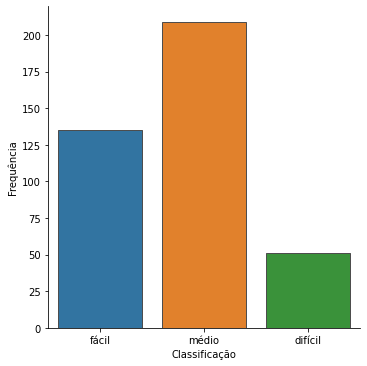

In [9]:
xtick_labels = {'fácil': 'facil', 'difícil': 'dificil'} if binary else {'fácil': 'facil', 'médio': 'medio', 'difícil': 'dificil'}
sns.catplot(data=classified, x='taxa_acerto', kind='count', edgecolor=".3", aspect=1.) \
    .set_xticklabels(xtick_labels) \
    .set_xlabels('Classificação') \
    .set_ylabels('Frequência')

In [10]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'f1_micro']

In [11]:
encoder = LabelEncoder()
classes = ['facil', 'dificil'] if binary else ['facil', 'medio', 'dificil']
encoder.fit(classes)

LabelEncoder()

In [12]:
# Recomendado não usar
def basic_train(ind_vars, y, model, binary_class, is_encoded):
    classes = ('facil', 'dificil') if binary_class else ('facil', 'medio', 'dificil')
    
    X_train, X_test, y_train, y_test = train_test_split(ind_vars, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if is_encoded:
        y_test = encoder.inverse_transform(y_test)
        y_pred = encoder.inverse_transform(y_pred)
    
    precision, recall, f1_macro, _ = precision_recall_fscore_support(y_pred, y_test, average='macro')
    f1_micro = f1_score(y_pred, y_test, average='micro')
    acc = accuracy_score(y_test, y_pred)
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=classes)
    
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
    }, cnf_matrix

In [14]:
def cross_val_train(ind_vars, y, model, binary_class, is_encoded):
    predicted_list = np.array([], dtype=int)
    tested_list = np.array([], dtype=int)
    kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    
    for train_index, test_index in kf.split(ind_vars, y):
        X_train, X_test = ind_vars.iloc[train_index], ind_vars.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Classe desbalanceada
        if y.name == 'taxa_acerto':
            oversample = SMOTE(random_state=42)
            X_train, y_train = oversample.fit_resample(X_train, y_train)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
   
        tested_list = np.append(tested_list, y_test)
        predicted_list = np.append(predicted_list, y_pred)
        
    if is_encoded:
        tested_list = encoder.inverse_transform(tested_list)
        predicted_list = encoder.inverse_transform(predicted_list)

    classes = ('facil', 'dificil') if binary_class else ('facil', 'medio', 'dificil')
    cnf_matrix = confusion_matrix(tested_list, predicted_list, labels=classes)
 
    precision, recall, f1_macro, _ = precision_recall_fscore_support(tested_list, predicted_list, average='macro')
    f1_micro = f1_score(tested_list, predicted_list, average='micro')
    acc = accuracy_score(tested_list, predicted_list)

    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
    }, cnf_matrix

In [15]:
def model_train(ind_vars, dep_vars, model, train_type = cross_val_train, binary_class = False, encode = False):
    scoring = ['accuracy', 'precision', 'recall', 'f1_macro', 'f1_micro']
    results = pd.DataFrame(index=dep_vars.columns, columns=scoring)
    cnf_matrixes = dict()
    
    for metric in results.index:
        ndf = pd.Series(encoder.transform(dep_vars[metric]), name=metric, dtype=int) if encode else dep_vars[metric]
        
        metric_train_result, cnf_matrix = train_type(ind_vars, ndf, model, binary_class, is_encoded=encode)
        results.loc[metric] = metric_train_result
        cnf_matrixes[metric] = cnf_matrix

    return results.sort_values(by=['f1_macro', 'f1_micro'], ascending=False), cnf_matrixes

In [16]:
def model_train_search_cv(ind_vars, dep_vars, model, model_class, distributions, n_iter, train_type = cross_val_train, binary_class = False, encode = False):
    scoring = ['accuracy', 'precision', 'recall', 'f1_macro', 'f1_micro']
    results = pd.DataFrame(index=dep_vars.columns, columns=scoring)
    cnf_matrixes = dict()       
    
    for metric in results.index:
        pipeline_ls = []
        if metric == 'taxa_acerto':
            pipeline_ls.append(("smote", SMOTE()))
        pipeline_ls.append(("model", model))
        
        pipe_distributions = { f'model__{key}': value for key, value in distributions.items() }
        pipeline = Pipeline(pipeline_ls)
        
        ndf = pd.Series(encoder.transform(dep_vars[metric]), name=metric, dtype=int) if encode else dep_vars[metric]
        cross_val = StratifiedKFold(n_splits=4, shuffle=True)
        
        clf = RandomizedSearchCV(
            estimator=pipeline, 
            param_distributions=pipe_distributions, 
            random_state=42, 
            cv=cross_val, 
            n_iter=n_iter, 
            n_jobs=-1,
            scoring='f1_micro',
            return_train_score=True
        )
        search = clf.fit(ind_vars, ndf)
        best_params = { key.split('__')[-1]: value for key, value in search.best_params_.items() }
        print('best params for {}: {}'.format(metric, best_params))
        best_model = model_class(**best_params)

        metric_train_result, cnf_matrix = train_type(ind_vars, ndf, best_model, binary_class, is_encoded=encode)
        results.loc[metric] = metric_train_result           
        cnf_matrixes[metric] = cnf_matrix
        
    return results.sort_values(by=['f1_macro', 'f1_micro'], ascending=False), cnf_matrixes

## Matriz de Confusão

In [17]:
def plot_confusion_matrix(cnf_matrix, title, binary = True):
    classes = ['fácil', 'difícil'] if binary else ['fácil', 'médio', 'difícil']
    np.set_printoptions(precision=2)
    
    plt.figure()
    plt.style.use(style='default')
    
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    
    plt.show()

## Experimentos

In [18]:
def push_best_results(best_results, df_results: pd.DataFrame, model):
    for dep_var, metrics in df_results.iterrows():
        acc_cur, f1_cur, _ = best_results[dep_var]
        acc_nxt, f1_nxt = df_results.loc[dep_var, ['accuracy', 'f1_micro']]
        if f1_nxt > f1_cur or (np.abs(f1_nxt - f1_cur) < 1e-6 and acc_nxt > acc_cur):
            best_results[dep_var] = acc_nxt, f1_nxt, model

In [19]:
columns = dep_vars.columns
best_results = dict()
for col in columns:
    best_results[col] = (0.0, 0.0, '')

### SVC

In [20]:
from sklearn.svm import SVC

In [21]:
svc = SVC()

In [24]:
kernels = ['rbf', 'poly']
degree = [2, 3]
C = np.arange(2, 1000)
random_state = [42]
distributions = dict(kernel=kernels, degree=degree, C=C, random_state=random_state)

In [25]:
scores, cnf_matrixes_svc = model_train_search_cv(ind_vars, classified, svc, SVC, distributions, 50, binary_class=binary)
push_best_results(best_results, scores, 'SVM')
scores

best params for taxa_acerto: {'random_state': 42, 'kernel': 'rbf', 'degree': 2, 'C': 808}
best params for num_submissoes: {'random_state': 42, 'kernel': 'rbf', 'degree': 2, 'C': 808}
best params for taxa_aceitacao: {'random_state': 42, 'kernel': 'rbf', 'degree': 2, 'C': 452}
best params for num_testes: {'random_state': 42, 'kernel': 'rbf', 'degree': 2, 'C': 364}
best params for num_consultas: {'random_state': 42, 'kernel': 'rbf', 'degree': 2, 'C': 869}
best params for num_erros: {'random_state': 42, 'kernel': 'rbf', 'degree': 3, 'C': 319}
best params for num_erros_lgcs: {'random_state': 42, 'kernel': 'rbf', 'degree': 2, 'C': 808}
best params for num_errors_stx: {'random_state': 42, 'kernel': 'rbf', 'degree': 3, 'C': 574}
best params for num_eventos: {'random_state': 42, 'kernel': 'poly', 'degree': 2, 'C': 799}
best params for num_eventos_del: {'random_state': 42, 'kernel': 'rbf', 'degree': 2, 'C': 869}
best params for tempo_implementacao: {'random_state': 42, 'kernel': 'rbf', 'degree':

,accuracy,precision,recall,f1_macro,f1_micro
tempo_implementacao,0.602532,0.600847,0.602359,0.601373,0.602532
num_eventos_del,0.562025,0.567761,0.56157,0.559434,0.562025
qtd_alteracoes_codigo,0.559494,0.540412,0.558775,0.540072,0.559494
num_eventos,0.534177,0.564135,0.533676,0.512153,0.534177
num_std_sem_submissao,0.488608,0.489603,0.491407,0.490404,0.488608
num_testes,0.481013,0.481213,0.480685,0.477846,0.481013
num_consultas,0.478481,0.478704,0.478237,0.477621,0.478481
taxa_acerto,0.463291,0.439676,0.494644,0.448458,0.463291
num_erros_lgcs,0.44557,0.445122,0.444708,0.442886,0.44557
taxa_aceitacao,0.432911,0.440171,0.432686,0.432893,0.432911


In [ ]:
plot_confusion_matrix(cnf_matrixes_svc['taxa_acerto'], title='', binary=binary)

### Árvore de Decisão

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
random_state = [42]
distributions = dict(criterion=criterion, splitter=splitter, random_state=random_state)

In [28]:
tree = DecisionTreeClassifier()
scores, cnf_matrixes_dt = model_train_search_cv(ind_vars, classified, tree, DecisionTreeClassifier, distributions, 4, binary_class=binary)
push_best_results(best_results, scores, 'Árvore de Decisão')
scores

best params for taxa_acerto: {'splitter': 'random', 'random_state': 42, 'criterion': 'gini'}
best params for num_submissoes: {'splitter': 'best', 'random_state': 42, 'criterion': 'entropy'}
best params for taxa_aceitacao: {'splitter': 'best', 'random_state': 42, 'criterion': 'entropy'}
best params for num_testes: {'splitter': 'random', 'random_state': 42, 'criterion': 'log_loss'}
best params for num_consultas: {'splitter': 'best', 'random_state': 42, 'criterion': 'entropy'}
best params for num_erros: {'splitter': 'best', 'random_state': 42, 'criterion': 'entropy'}
best params for num_erros_lgcs: {'splitter': 'random', 'random_state': 42, 'criterion': 'log_loss'}
best params for num_errors_stx: {'splitter': 'random', 'random_state': 42, 'criterion': 'log_loss'}
best params for num_eventos: {'splitter': 'random', 'random_state': 42, 'criterion': 'log_loss'}
best params for num_eventos_del: {'splitter': 'best', 'random_state': 42, 'criterion': 'entropy'}
best params for tempo_implementaca

,accuracy,precision,recall,f1_macro,f1_micro
tempo_implementacao,0.587342,0.590444,0.587169,0.588225,0.587342
num_eventos,0.574684,0.577858,0.574447,0.575927,0.574684
num_eventos_del,0.572152,0.569157,0.571787,0.570001,0.572152
taxa_acerto,0.564557,0.526669,0.55175,0.536322,0.564557
qtd_alteracoes_codigo,0.493671,0.488591,0.493253,0.490569,0.493671
num_consultas,0.491139,0.486519,0.490824,0.487675,0.491139
num_testes,0.488608,0.481677,0.488241,0.483725,0.488608
num_erros_lgcs,0.468354,0.466411,0.467765,0.466173,0.468354
num_std_sem_submissao,0.437975,0.444952,0.440201,0.440575,0.437975
num_erros,0.420253,0.418511,0.42004,0.418344,0.420253


### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
n_estimators = np.linspace(start=100, stop=1000, num=10, dtype=int)
criterion = ['gini', 'entropy', 'log_loss']
class_weight = ['balanced', 'balanced_subsample', None]
random_state = [42]
distributions = dict(
    n_estimators=n_estimators,
    criterion=criterion,
    class_weight=class_weight,
    random_state=random_state
)

In [ ]:
# model = RandomForestClassifier(n_estimators=10, criterion='entropy', class_weight='balanced', random_state=42)
# scores, cnf_matrixes = model_train(ind_vars, classified, model, train_type = cross_val_train, binary_class=binary)

In [31]:
rd_forest = RandomForestClassifier()
scores, cnf_matrixes_rf = model_train_search_cv(ind_vars, classified, rd_forest, RandomForestClassifier, distributions, 50, binary_class=binary)
push_best_results(best_results, scores, 'Random Forest')
scores

best params for taxa_acerto: {'random_state': 42, 'n_estimators': 200, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}
best params for num_submissoes: {'random_state': 42, 'n_estimators': 1000, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}
best params for taxa_aceitacao: {'random_state': 42, 'n_estimators': 200, 'criterion': 'log_loss', 'class_weight': None}
best params for num_testes: {'random_state': 42, 'n_estimators': 400, 'criterion': 'gini', 'class_weight': 'balanced'}
best params for num_consultas: {'random_state': 42, 'n_estimators': 100, 'criterion': 'entropy', 'class_weight': None}
best params for num_erros: {'random_state': 42, 'n_estimators': 900, 'criterion': 'entropy', 'class_weight': None}
best params for num_erros_lgcs: {'random_state': 42, 'n_estimators': 600, 'criterion': 'log_loss', 'class_weight': 'balanced_subsample'}
best params for num_errors_stx: {'random_state': 42, 'n_estimators': 100, 'criterion': 'gini', 'class_weight': 'balanced_s

,accuracy,precision,recall,f1_macro,f1_micro
tempo_implementacao,0.658228,0.658518,0.657896,0.658025,0.658228
num_eventos,0.612658,0.610612,0.612287,0.610248,0.612658
num_eventos_del,0.6,0.593146,0.599526,0.595436,0.6
qtd_alteracoes_codigo,0.602532,0.588241,0.601897,0.589645,0.602532
num_testes,0.544304,0.544646,0.544105,0.544336,0.544304
num_consultas,0.539241,0.537681,0.538939,0.538116,0.539241
taxa_acerto,0.582278,0.529078,0.518445,0.522881,0.582278
num_std_sem_submissao,0.501266,0.508586,0.504515,0.506331,0.501266
num_erros_lgcs,0.483544,0.474297,0.482452,0.477108,0.483544
num_submissoes,0.473418,0.470186,0.473475,0.471325,0.473418


In [ ]:
plot_confusion_matrix(cnf_matrixes_rf['taxa_acerto'], '', binary=binary)

### GradientBoosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gboost = GradientBoostingClassifier()

In [34]:
loss = ['log_loss', 'exponential']
learning_rate = np.linspace(start=0.01, stop=0.5, num=10)
n_estimators = np.linspace(start=1, stop=500, num=10, dtype=int)
criterion = ['friedman_mse', 'squared_error']
random_state = [42]

distributions = dict(
    loss = loss,
    learning_rate = learning_rate,
    n_estimators = n_estimators,
    criterion = criterion,
    random_state=random_state,
)

In [ ]:
# model = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators=1000, criterion='mse')
# scores, cnf_matrixes = model_train(ind_vars, classified, model)
# push_best_results(best_results, scores, 'Gradient Boosting')
# scores

In [35]:
scores, cnf_matrixes_gb = model_train_search_cv(ind_vars, classified, model=gboost, model_class=GradientBoostingClassifier, distributions=distributions, n_iter=10, binary_class=binary)
push_best_results(best_results, scores, 'Gradient Boosting')
scores

/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for taxa_acerto: {'random_state': 42, 'n_estimators': 500, 'loss': 'log_loss', 'learning_rate': 0.01, 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_submissoes: {'random_state': 42, 'n_estimators': 500, 'loss': 'log_loss', 'learning_rate': 0.01, 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for taxa_aceitacao: {'random_state': 42, 'n_estimators': 222, 'loss': 'log_loss', 'learning_rate': 0.22777777777777777, 'criterion': 'friedman_mse'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_testes: {'random_state': 42, 'n_estimators': 500, 'loss': 'log_loss', 'learning_rate': 0.01, 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_consultas: {'random_state': 42, 'n_estimators': 333, 'loss': 'log_loss', 'learning_rate': 0.33666666666666667, 'criterion': 'friedman_mse'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_erros: {'random_state': 42, 'n_estimators': 333, 'loss': 'log_loss', 'learning_rate': 0.17333333333333334, 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_erros_lgcs: {'random_state': 42, 'n_estimators': 333, 'loss': 'log_loss', 'learning_rate': 0.33666666666666667, 'criterion': 'friedman_mse'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_errors_stx: {'random_state': 42, 'n_estimators': 500, 'loss': 'log_loss', 'learning_rate': 0.33666666666666667, 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_eventos: {'random_state': 42, 'n_estimators': 500, 'loss': 'log_loss', 'learning_rate': 0.33666666666666667, 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_eventos_del: {'random_state': 42, 'n_estimators': 333, 'loss': 'log_loss', 'learning_rate': 0.17333333333333334, 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for tempo_implementacao: {'random_state': 42, 'n_estimators': 500, 'loss': 'log_loss', 'learning_rate': 0.01, 'criterion': 'squared_error'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for num_std_sem_submissao: {'random_state': 42, 'n_estimators': 333, 'loss': 'log_loss', 'learning_rate': 0.33666666666666667, 'criterion': 'friedman_mse'}


/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/home/jackson/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  

best params for qtd_alteracoes_codigo: {'random_state': 42, 'n_estimators': 500, 'loss': 'log_loss', 'learning_rate': 0.33666666666666667, 'criterion': 'squared_error'}


,accuracy,precision,recall,f1_macro,f1_micro
tempo_implementacao,0.663291,0.666585,0.663004,0.664588,0.663291
num_eventos,0.607595,0.614782,0.607371,0.609629,0.607595
num_eventos_del,0.594937,0.600712,0.594745,0.597141,0.594937
qtd_alteracoes_codigo,0.539241,0.533691,0.538804,0.535906,0.539241
num_testes,0.529114,0.532364,0.528877,0.530162,0.529114
num_consultas,0.529114,0.531654,0.528838,0.530039,0.529114
taxa_acerto,0.56962,0.514303,0.506973,0.510195,0.56962
num_erros_lgcs,0.501266,0.495404,0.500324,0.496919,0.501266
num_submissoes,0.478481,0.480426,0.478526,0.479316,0.478481
num_errors_stx,0.478481,0.480182,0.478487,0.478692,0.478481


### Extreme Gradient Boosting

In [36]:
xgb = XGBClassifier()

In [37]:
n_estimators = np.linspace(start=100, stop=500, num=10, dtype=int)
max_depth = np.linspace(start=3, stop=15, num=15, dtype=int)
eta = [0.0001, 0.001, 0.01, 0.1, 1.0]
subsample = np.linspace(start=0.1, stop=1.0, num=10, dtype=np.float32)
random_state = [42]

distributions = dict(n_estimators=n_estimators, max_depth=max_depth, eta=eta, subsample=subsample, random_state=random_state)
distributions

{'n_estimators': array([100, 144, 188, 233, 277, 322, 366, 411, 455, 500]),
 'max_depth': array([ 3,  3,  4,  5,  6,  7,  8,  9,  9, 10, 11, 12, 13, 14, 15]),
 'eta': [0.0001, 0.001, 0.01, 0.1, 1.0],
 'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ], dtype=float32),
 'random_state': [42]}

In [38]:
scores, cnf_matrixes_xgb = model_train_search_cv(ind_vars, classified, model=xgb, model_class=XGBClassifier, distributions=distributions, n_iter=50, binary_class=binary, encode=True)
push_best_results(best_results, scores, 'Extreme Gradient Boosting')
scores

best params for taxa_acerto: {'subsample': 1.0, 'random_state': 42, 'n_estimators': 366, 'max_depth': 9, 'eta': 0.0001}
best params for num_submissoes: {'subsample': 0.5, 'random_state': 42, 'n_estimators': 411, 'max_depth': 6, 'eta': 0.0001}
best params for taxa_aceitacao: {'subsample': 0.7, 'random_state': 42, 'n_estimators': 188, 'max_depth': 9, 'eta': 0.1}
best params for num_testes: {'subsample': 0.5, 'random_state': 42, 'n_estimators': 277, 'max_depth': 6, 'eta': 0.01}
best params for num_consultas: {'subsample': 0.2, 'random_state': 42, 'n_estimators': 411, 'max_depth': 3, 'eta': 0.01}
best params for num_erros: {'subsample': 0.2, 'random_state': 42, 'n_estimators': 144, 'max_depth': 12, 'eta': 0.1}
best params for num_erros_lgcs: {'subsample': 0.1, 'random_state': 42, 'n_estimators': 500, 'max_depth': 9, 'eta': 0.1}
best params for num_errors_stx: {'subsample': 0.2, 'random_state': 42, 'n_estimators': 322, 'max_depth': 7, 'eta': 0.1}
best params for num_eventos: {'subsample': 0

,accuracy,precision,recall,f1_macro,f1_micro
tempo_implementacao,0.668354,0.671156,0.668074,0.669459,0.668354
num_eventos_del,0.605063,0.600632,0.604596,0.60147,0.605063
num_eventos,0.597468,0.60014,0.597174,0.597527,0.597468
qtd_alteracoes_codigo,0.602532,0.592707,0.602012,0.595412,0.602532
num_testes,0.536709,0.538425,0.53651,0.537245,0.536709
num_consultas,0.516456,0.515296,0.516077,0.514393,0.516456
num_std_sem_submissao,0.491139,0.499169,0.493913,0.49602,0.491139
num_erros_lgcs,0.498734,0.492794,0.497952,0.494272,0.498734
num_submissoes,0.491139,0.489586,0.491287,0.490314,0.491139
taxa_acerto,0.536709,0.478675,0.475179,0.47505,0.536709


In [39]:
best_results_df = pd.DataFrame(best_results, index=['f1_micro', 'accuracy', 'classificador']) \
    .T.sort_values(by=['f1_micro', 'accuracy'], ascending=False)
best_results_df

,f1_micro,accuracy,classificador
tempo_implementacao,0.668354,0.668354,Extreme Gradient Boosting
num_eventos,0.612658,0.612658,Random Forest
num_eventos_del,0.605063,0.605063,Extreme Gradient Boosting
qtd_alteracoes_codigo,0.602532,0.602532,Random Forest
taxa_acerto,0.582278,0.582278,Random Forest
num_testes,0.544304,0.544304,Random Forest
num_consultas,0.539241,0.539241,Random Forest
num_erros_lgcs,0.501266,0.501266,Gradient Boosting
num_std_sem_submissao,0.501266,0.501266,Random Forest
num_submissoes,0.491139,0.491139,Extreme Gradient Boosting


In [ ]:
best_results_df.to_csv('results_classification_3n_microavg2.csv')

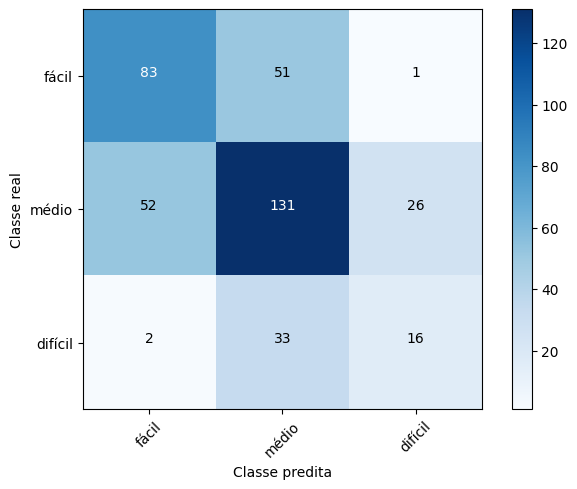

In [43]:
plot_confusion_matrix(cnf_matrixes_rf['taxa_acerto'], '', binary=binary)

## Reduzindo número de variáveis independentes

In [ ]:
best_code_metrics = pd.read_csv('./best_code_metrics.csv', index_col='metric')
code_attrs = pd.DataFrame(index=best_code_metrics.index, columns=best_code_metrics.columns)
for row in best_code_metrics.iterrows():
    cols = row[1].apply(lambda item: eval(item)[1])
    code_attrs.loc[row[0],:] = cols
code_attrs

In [ ]:
model_train_search_cv(ind_vars, classified, svc, SVC, distributions, 100)

## Selecionando métricas mais comuns

In [ ]:
attrs = {}
for row in code_attrs.iterrows():
    for key in row[1]:
        if not key in attrs:
            attrs[key] = 0
        attrs[key] += 1
best_attrs = list(attrs.items())
best_attrs.sort(key=lambda key: key[1], reverse=True)
best_attrs = list(map(lambda x: x[0], best_attrs[:10]))
best_attrs

In [ ]:
filtered_classified = ind_vars[best_attrs] 
filtered_classified